In [2]:
import parser 
import pandas as pd
import itertools
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from voting_rules import voting_rules as vr

In [3]:
def is_consistent2(ballot, perm):

    if len(ballot) == 0:
        return True
    c = ballot[0]
    index = 0
    for i in range(len(perm)):
        if (c == perm[i]):
            index = i
            break
    def check(i, j, p):
        '''
        i: index in the ballot
        j: index in the permutation
        p = parent 
        '''
        if j < 0 or j > len(perm):
            return False
        
        if (i == len(ballot) - 1):
            return True
        
        if (i == 0):
            if (j + 1 >= len(perm)):
                if ballot[i + 1] != perm[j - 1]:
                    return False 
            if j - 1 < 0:
                if ballot[i + 1] != perm[j + 1]:
                    return False
            if ballot[i + 1] != perm[j - 1] and ballot[i + 1] != perm[j + 1]:
                return False

        if p != j + 1 and j + 1 < len(perm) and ballot[i + 1] == perm[j + 1]:
            return check(i + 1, j + 1, j)
        elif p != j - 1 and ballot[i + 1] == perm[j - 1]:
            return check(i + 1, j - 1, j)
        else:
            if p != j:
                return check(i, p, p)
            else:
                return False
    return check(0, index, -1)


In [3]:
def is_consistent(ballot):
    if len(ballot) == 0 or len(ballot) == 1:
        return True
    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    l = []
    if abs(x) >= 0.5 or x == 0:
        return False 
    x += ballot[0]
    for c in ballot:
        l.append(abs(c - x))
    if(all(l[i] <= l[i + 1] for i in range(len(l) -  1))):
        return True 
    return False

In [4]:
def dim(ballots, candidates):
    perms = list(itertools.permutations(candidates))
    #most consistant permutation
    mcp = None
    c_mcp = 0
    x = len(candidates)
    l = [i for i in range(1, x + 1)]
    for perm in perms:
        temp = {}
        i = 1
        for candidate in perm:
            temp[candidate] = i
            i += 1
        c = 0
        for b in ballots:
            b_num = []
            for candidate in b:
                b_num.append(temp[candidate])
            if (is_consistent(b_num)):
                c += ballots[b]
        if mcp is None or c > c_mcp:
            c_mcp = c
            mcp = perm
    return (c_mcp/sum(ballots.values())), mcp

In [5]:
def dimensionality_analysis(directory, filename):
    
    
    

    
    

    if len(candidates) <= 7:
        gamma, mcp = dim(ballots, candidates)
        
    
    #print(df)
    #print(df7)
    return df


In [10]:
matched_elections = pd.read_csv("dataverse_files_partisan 2.csv")
row_num = matched_elections[matched_elections["filename"] == "Alaska_08162022_HouseofRepresentativesSpecial.csv"].index[0]
print(row_num)
print(matched_elections.loc[row_num, "type"])

1
R


In [12]:
directory = "dataverse_files"
matched_elections = pd.read_csv("dataverse_files_partisan 2.csv")
df = pd.DataFrame(columns=["Election", "candidates", "Partisan", "Gamma", "Most Consistent Permutaition"])

for filename in os.listdir(directory):
    
    ballots, candidates = parser.parser(os.path.join(directory, filename))
    election = vr(ballots, candidates)
    row_num = matched_elections[matched_elections["filename"] == filename].index[0]
    s = "filename==" + "'" + filename + "'"
    
    if len(candidates) <= 7:

        gamma,  mcp = dim(ballots, candidates)
        matched_elections.loc[row_num, "gamma"] = gamma

    
    matched_elections.loc[row_num, "candidates"] = len(candidates)
    matched_elections.loc[row_num, "irv"] = election.irv()
    matched_elections.loc[row_num, "condorcet"] = election.condorcet()
    try:
        matched_elections.loc[row_num, "approval"] = election.approval()
    except:
        print(filename)
        
    matched_elections.loc[row_num, "plurality"] = election.plurality()

   
    
print(matched_elections)
    

In [10]:
print(matched_elections)
matched_elections.to_csv("matched.csv")

                                              filename partisan  level type  \
0       Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv       DP    3.0    E   
1    Alaska_08162022_HouseofRepresentativesSpecial.csv        1    3.0    R   
2       Alaska_11082022_GovernorLieutenantGovernor.csv        1    2.0    E   
3                   Alaska_11082022_HouseDistrict1.csv        1    2.0    R   
4                   Alaska_11082022_HouseDistrict2.csv        1    2.0    R   
..                                                 ...      ...    ...  ...   
439                      TakomaPark_11082022_Mayor.csv        0    1.0    E   
440                        Vineyard_11022021_Mayor.csv        0    1.0    E   
441                  Vineyard_11052019_CityCouncil.csv        0    1.0    R   
442                   WoodlandHills_11022021_Mayor.csv        0    1.0    E   
443    Wyoming_04172020_PRESIDENTOFTHEUNITEDSTATES.csv      NaN    3.0    E   

     candidates     gamma  irv   condorcet         

In [ ]:
def plot(ballots, candidates, perm):
    temp = {}
    i = 1
    for c in perm:
        temp[c] = i
        i += 1

In [6]:
df = dimensionality_analysis("dataverse_files")
print(df.head())

filename  Portland_06142022_SchoolboardAL-1.csv Partisan:  False
mcp:  ('Albert, Stephanie G.', 'Grant, Benjamin K.', 'Lentz, Sarah M.', 'Hang, Stacey L.', 'Mancini, Kimberly A.', 'Schertz, Amber J.', 'Ward, Richard L.')
gamma:  0.6286589876360562
{(): 562, ('Mancini, Kimberly A.', 'Hang, Stacey L.', 'Grant, Benjamin K.'): 3, ('Lentz, Sarah M.', 'Hang, Stacey L.', 'Grant, Benjamin K.'): 13, ('Hang, Stacey L.', 'Lentz, Sarah M.'): 25, ('Hang, Stacey L.', 'Grant, Benjamin K.', 'Lentz, Sarah M.'): 6, ('Grant, Benjamin K.', 'Mancini, Kimberly A.', 'Lentz, Sarah M.'): 7, ('Hang, Stacey L.', 'Lentz, Sarah M.', 'Grant, Benjamin K.', 'Albert, Stephanie G.'): 3, ('Hang, Stacey L.', 'Albert, Stephanie G.', 'Grant, Benjamin K.', 'Lentz, Sarah M.', 'Schertz, Amber J.', 'Ward, Richard L.', 'Mancini, Kimberly A.'): 1, ('Mancini, Kimberly A.', 'Lentz, Sarah M.', 'Hang, Stacey L.', 'Albert, Stephanie G.', 'Schertz, Amber J.'): 1, ('Grant, Benjamin K.', 'Albert, Stephanie G.'): 63, ('Albert, Stephanie 

In [9]:
print(df.head())
df.to_csv("gamma.csv")

                                            Election  candidates  Partisan  \
0       Oakland_11042014_SchoolDirectorDistrict2.csv           2     False   
1  Berkeley_11032020_MemberCityCouncilDist2Berkel...           4     False   
2                  Berkeley_11042014_CityAuditor.csv           1     False   
3                Alaska_11082022_HouseDistrict23.csv           2      True   
4         Berkeley_11042014_CityCouncilDistrict8.csv           4     False   

      Gamma                       Most Consistent Permutaition  
0  1.000000            (AIMEE ENG, WILLIAM ''BO'' GHIRARDELLI)  
1  0.720361  (CHERYL DAVILA, TERRY TAPLIN, ALEX SHARENKO, T...  
2  1.000000                                 (ANN-MARIE HOGAN,)  
3  1.000000                 (Branson, Roger L., Allard, Jamie)  
4  0.582712  (GEORGE BEIER, MIKE ALVAREZ COHEN, LORI DROSTE...  


In [7]:
def dimensionality_analysis_primary(directory):
    
    matched_elections = pd.read_csv("dataverse_files_partisan 2.csv")
    df = pd.DataFrame(columns=["Election", "candidates", "Party", "Gamma", "Most Consistent Permutaition"])
    df7 = pd.DataFrame(columns=["Election", "candidates", "Party", "Gamma", "Most Consistent Permutaition"])
    party  = "D"
    for filename in os.listdir(directory):
        s = "filename==" + "'" + filename + "'"
        try:
            #print(str(matched_elections.query(s)["partisan"].tolist()[0]))
            if str(matched_elections.query(s)["partisan"].tolist()[0]) == "DP":
                party = "D"
            elif str(matched_elections.query(s)["partisan"].tolist()[0]) == "RP":
                party = "R"
            else:
                continue
                
        except:
            continue
        
        
        ballots, candidates = parser.parser(os.path.join(directory, filename))
        
        
        #print(s)

        if len(candidates) <= 7:
            gamma, mcp = dim(ballots, candidates, party)
            df.loc[len(df)] = [filename, len(candidates), party, gamma, mcp]
            if len(candidates) == 7:
                df7.loc[len(df7)] = [filename, len(candidates), party, gamma, mcp]
                print("filename ", filename, "Partisan: ", party)
                print("mcp: ", mcp)
                print("gamma: ", gamma)
                print(ballots)
                print()
    
    #print(df)
    #print(df7)
    return df


In [8]:
primary_df = dimensionality_analysis_primary("dataverse_files")



filename  NewYorkCity_06222021_DEMCouncilMember35thCouncilDistrict.csv Partisan:  D
mcp:  ('Hector Robertson', 'Deirdre M. Levy', 'Crystal Hudson', 'Michael Hollingsworth', 'Renee T. Collymore', 'Curtis M. Harris', 'Regina A. Kinsey')
gamma:  0.9613948326087798
{(): 301155, ('Renee T. Collymore', 'Curtis M. Harris', 'Michael Hollingsworth'): 18, ('Deirdre M. Levy',): 418, ('Crystal Hudson', 'Hector Robertson', 'Renee T. Collymore', 'Curtis M. Harris'): 1442, ('Michael Hollingsworth', 'Deirdre M. Levy', 'Curtis M. Harris', 'Regina A. Kinsey', 'Crystal Hudson'): 11, ('Crystal Hudson', 'Renee T. Collymore', 'Curtis M. Harris'): 87, ('Crystal Hudson', 'Hector Robertson', 'Curtis M. Harris', 'Renee T. Collymore'): 8, ('Deirdre M. Levy', 'Curtis M. Harris', 'Michael Hollingsworth', 'Regina A. Kinsey'): 5, ('Crystal Hudson', 'Deirdre M. Levy'): 108, ('Renee T. Collymore', 'Curtis M. Harris'): 76, ('Crystal Hudson',): 3059, ('Michael Hollingsworth', 'Crystal Hudson', 'Hector Robertson', 'Deird

In [9]:
print(primary_df)

                                             Election  candidates Party  \
0   NewYorkCity_06222021_REPCouncilMember23rdCounc...           2     R   
1   NewYorkCity_06222021_REPBoroughPresidentRichmo...           4     R   
2      Kansas_05022020_PRESIDENTOFTHEUNITEDSTATES.csv           5     D   
3   NewYorkCity_06222021_DEMCouncilMember28thCounc...           3     D   
4   NewYorkCity_06222021_DEMCouncilMember31stCounc...           3     D   
5   NewYorkCity_06222021_DEMCouncilMember35thCounc...           7     D   
6   NewYorkCity_06222021_DEMCouncilMember32ndCounc...           6     D   
7   NewYorkCity_06222021_DEMCouncilMember30thCounc...           2     D   
8   NewYorkCity_06222021_DEMCouncilMember11thCounc...           7     D   
9   NewYorkCity_06222021_DEMCouncilMember14thCounc...           6     D   
10  NewYorkCity_06222021_DEMCouncilMember5thCounci...           7     D   
11  NewYorkCity_06222021_DEMCouncilMember2ndCounci...           2     D   
12  NewYorkCity_06222021_

In [15]:
d_D = {}
d_R = {}
min_gamma = None
min_row = None 
for i, row in primary_df.iterrows():
    if row["Party"] == "D":
        if row["candidates"] not in d_D:
            d_D[row["candidates"]] = []
        d_D[row["candidates"]].append(row["Gamma"])
        if min_gamma is None or row["Gamma"] < min_gamma:
            min_gamma = row["Gamma"]
            min_row = row
    
    if row["Party"] == "R":
        if row["candidates"] not in d_R:
            d_R[row["candidates"]] = []
        d_R[row["candidates"]].append(row["Gamma"])

print(min_row)
print(min_row.loc["Election"])

Election                        NewYorkCity_06222021_DEMBoroughPresidentNewYor...
candidates                                                                      7
Party                                                                           D
Gamma                                                                    0.575641
Most Consistent Permutaition    (Guillermo A. Perez, Elizabeth R. Caputo, Ben ...
Name: 29, dtype: object
NewYorkCity_06222021_DEMBoroughPresidentNewYork.csv


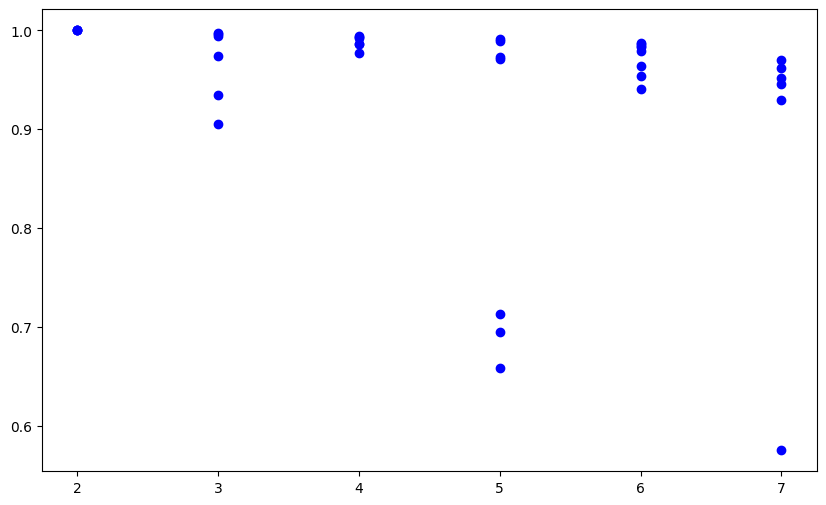

In [11]:
#plotting the democratic primaries

plt.figure(figsize=(10, 6))

for x, y_values in d_D.items():
    for y in y_values:
        plt.scatter(x, y, color='b')

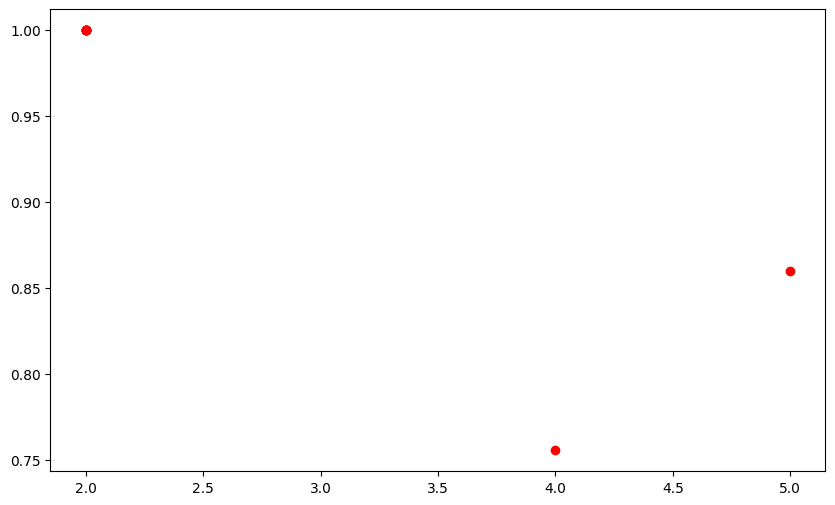

In [12]:
#plotting the republican primaries 

plt.figure(figsize=(10, 6))

for x, y_values in d_R.items():
    
    for y in y_values:
        plt.scatter(x, y, color='r')

In [26]:
ballots, candidates = parser.parser("dataverse_files/Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv")
perms = itertools.permutations(candidates)
mcp = None
c_mcp = None
for perm in perms:
    temp = {}
    i = 1
    for candidate in perm:
        temp[candidate] = i
        i += 1
    c = 0
    for b in ballots:
        b_num = []
        for candidate in b:
            b_num.append(temp[candidate])
        if (is_consistent(b_num)):
            c += ballots[b]
    if mcp is None or c > c_mcp:
        c_mcp = c
        mcp = perm
    if perm == ('Guillermo A. Perez','Ben Kallos', 'Elizabeth R. Caputo', 'Mark D. Levine','Lindsey C. Boylan', 'Brad M. Hoylman', 'Kimberly R. Watkins'):
        print(perm, "  ", c/sum(ballots.values()))
    #print(perm, "   ", c/sum(ballots.values()))
print()
print(mcp, "   ", c_mcp/sum(ballots.values()))


KeyboardInterrupt: 

<Axes: xlabel='candidates', ylabel='Gamma'>

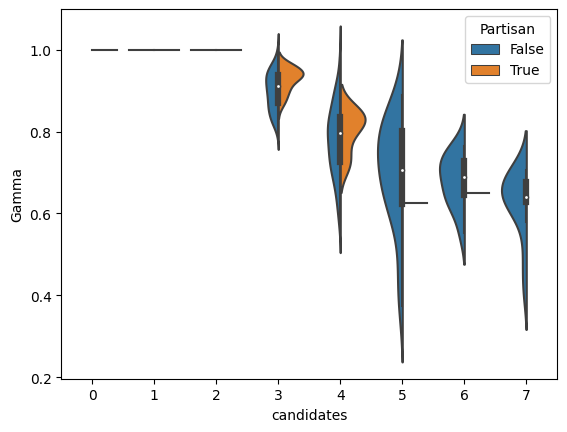

In [8]:
d_p = {}
d_nonp = {}
for i, row in df.iterrows():
    if row["Partisan"] == True:
        if row["candidates"] not in d_p:
            d_p[row["candidates"]] = []
        d_p[row["candidates"]].append(row["Gamma"])
    if row["Partisan"] == False:
        if row["candidates"] not in d_nonp:
            d_nonp[row["candidates"]] = []
        d_nonp[row["candidates"]].append(row["Gamma"])

sns.violinplot(data=df, x="candidates", y="Gamma", hue="Partisan", split=True)

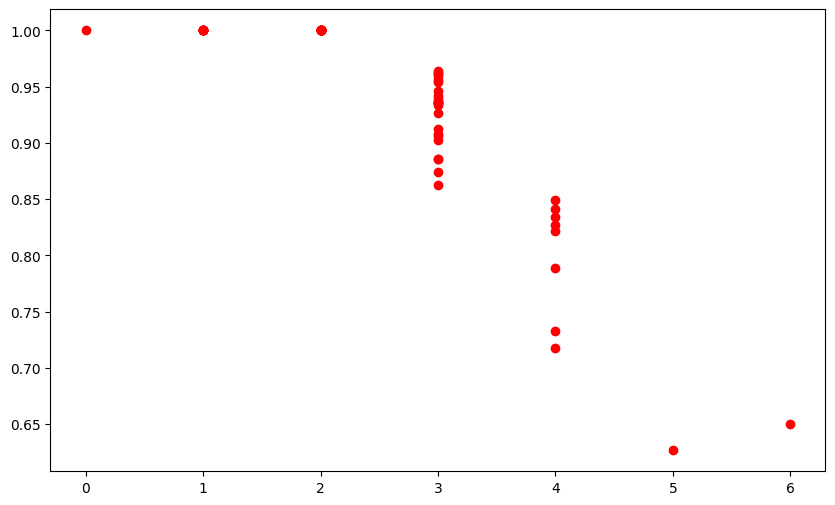

In [55]:
plt.figure(figsize=(10, 6))

for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')

"""for x, y_values in d_nonp.items():
    for y in y_values:
        plt.scatter(x, y, color='b')"""
plt.show()

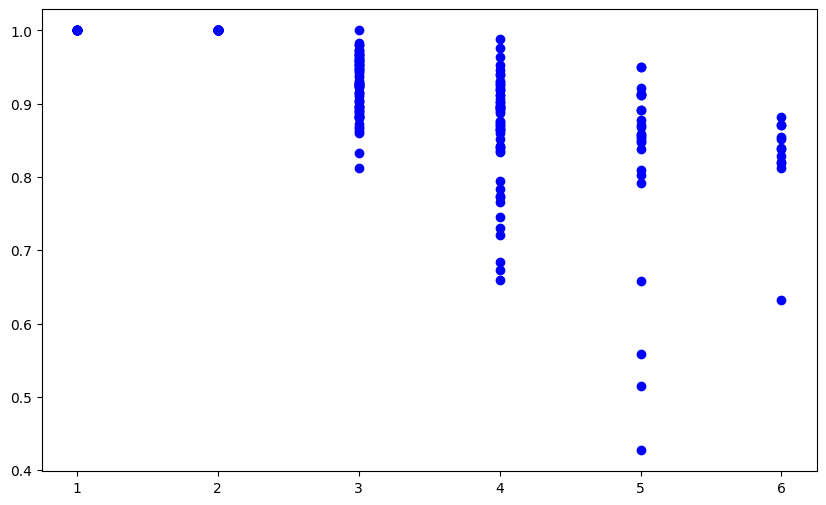

In [8]:
plt.figure(figsize=(10, 6))

'''for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')'''

for x, y_values in d_nonp.items():
    for y in y_values:
        plt.scatter(x, y, color='b')
plt.show()

In [12]:
p_counter = 0 
for n in d_p:
    p_counter += len(d_p[n])
nonp_counter = 0 
for n in d_nonp:
    nonp_counter += len(d_nonp[n])
print(p_counter)
print(nonp_counter)
print(p_counter+nonp_counter)

122
239
361


In [39]:
# d1: partisan, d2: nonpartisan
d1, d2 = dim()

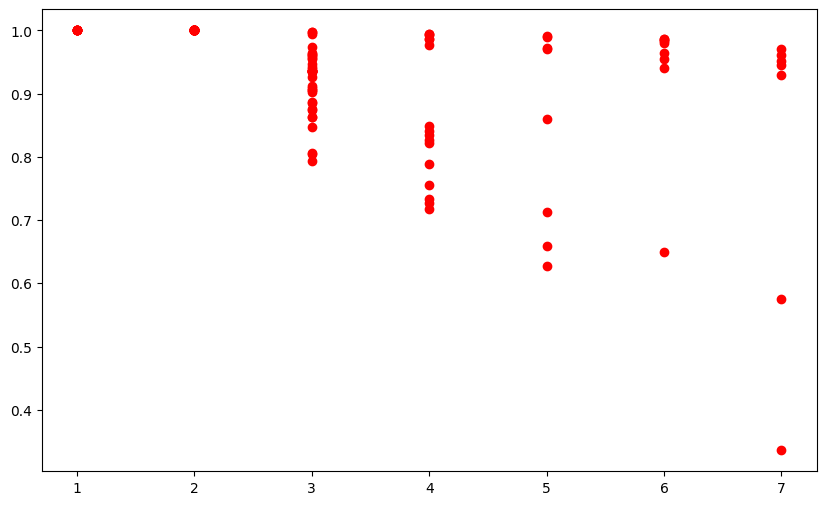

In [44]:
plt.figure(figsize=(10, 6))

for x, y_values in d1.items():
    for y in y_values:
        if x != 0:
            plt.scatter(x, y, color='r')

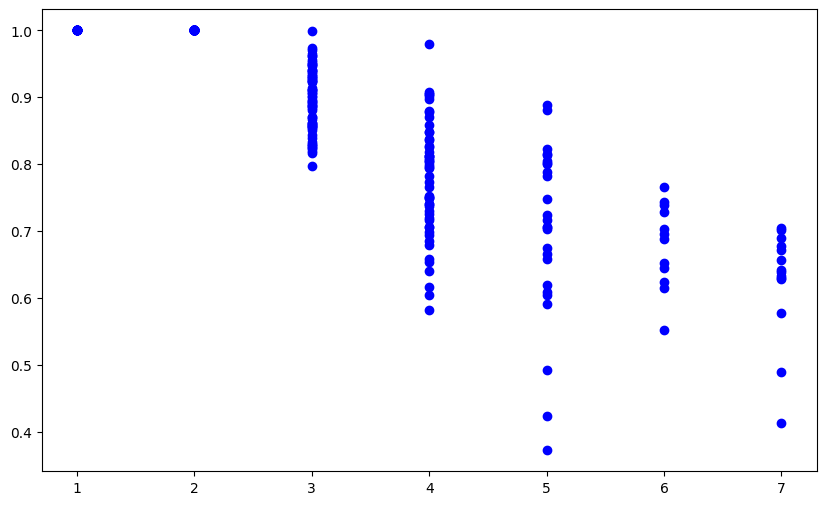

In [43]:
plt.figure(figsize=(10, 6))

'''for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')'''

for x, y_values in d2.items():
    for y in y_values:
        plt.scatter(x, y, color='b')
plt.show()

In [57]:


#df = pd.DataFrame(columns=["candidates", "gamma", "partisan"])
'''for x, y_values in d_p.items():
    for y in y_values:
        df.loc[len(df)] = [x, y, True]
for x, y_values in d2.items():
    for y in y_values:
        df.loc[len(df)] = [x, y, False]
df.to_csv("gamma.csv", index=False)'''

NameError: name 'd1' is not defined

In [58]:
sns.violinplot(data=df, x="candidates", y="gamma", hue="partisan", split=True)

ValueError: min() arg is an empty sequence

('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.')  :   0.7047953903727421
('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Hoar, William R.S.', 'Bond, Tiffany L.')  :   0.61705778246126
('REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.', 'Hoar, William R.S.')  :   0.7862677150461368
('REP Poliquin, Bruce', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'DEM Golden, Jared F.')  :   0.6472594874289034
('REP Poliquin, Bruce', 'Hoar, William R.S.', 'DEM Golden, Jared F.', 'Bond, Tiffany L.')  :   0.7884360772234156
('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.')  :   0.7873046109782623
('DEM Golden, Jared F.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'Hoar, William R.S.')  :   0.609792755914022
('DEM Golden, Jared F.', 'REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.')  :   0.6001904916305273
('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'Hoar, William R.S.')  

<Axes: xlabel='x', ylabel='y'>

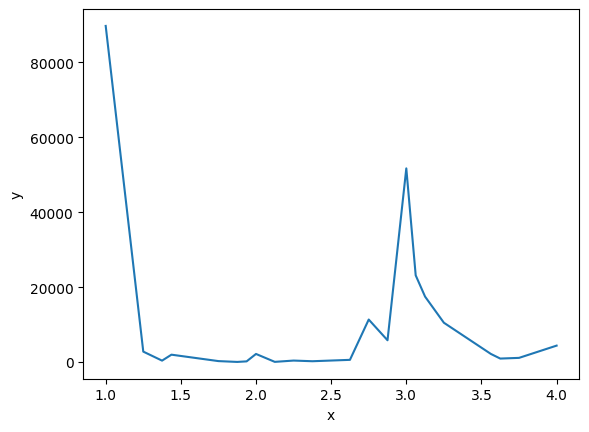

In [27]:
import seaborn as sns

filename = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"
ballots, candidates = parser.parser(filename)

perms = list(itertools.permutations(candidates))
#most consistant permutation
mcp = None
c_mcp = 0
l = [i for i in range(1, len(candidates) + 1)]
for perm in perms:
    temp = {}
    i = 1
    for candidate in perm:
        temp[candidate] = i
        i += 1
    c = 0
    for b in ballots:
        b_num = []
        for candidate in b:
            b_num.append(temp[candidate])
        if (is_consistant(b_num, l)):
            c += ballots[b]
    if mcp is None or c > c_mcp:
        c_mcp = c
        mcp = perm
    print(perm, " :  ", c/sum(ballots.values()))
print("gamma: ", c_mcp/sum(ballots.values()))
print("mcp: ", mcp)
positions = {}
temp = {}
i = 1
for candidate in mcp:
    temp[candidate] = i
    i += 1
c = 0
ballot_index = {}
index = 1
for b in ballots:
    ballot = []
    for candidate in b:
        ballot.append(temp[candidate])
    if len(ballot) == 0 or is_consistant(ballot, mcp) is False:
        continue

    if b not in ballot_index:
        ballot_index[b] = index 
        index += 1

    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    x += ballot[0]
    if x not in positions:
        positions[x] = 0
    print(b, " : ", x)
    positions[x] += ballots[b]
p_df = pd.DataFrame(columns=["x", "y"])
for p in positions:
    p_df.loc[len(p_df)] = [p, positions[p]]

sns.lineplot(data=p_df, x="x", y="y")


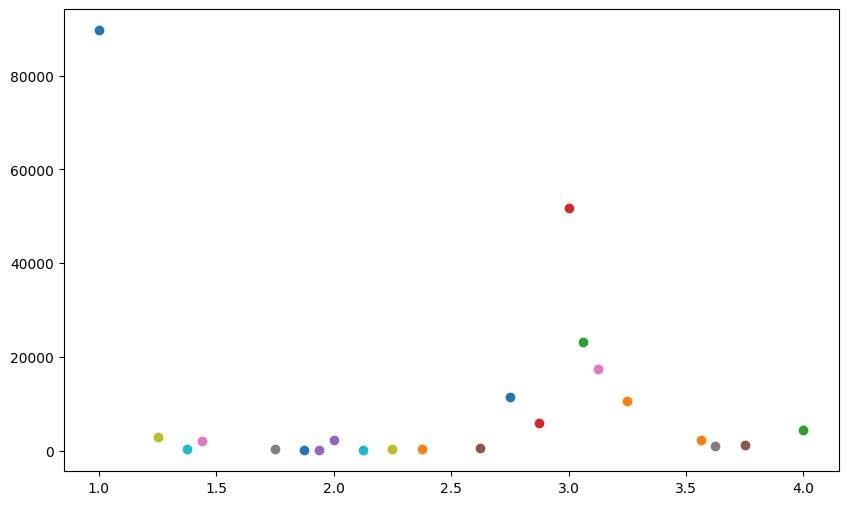

In [24]:
plt.figure(figsize=(10, 6))

for x, y in positions.items():
    plt.scatter(x, y)

('Golden, Jared Forrest', 'Bond, Tiffany', 'Poliquin, Bruce')  :   0.9355499307571481
('Golden, Jared Forrest', 'Poliquin, Bruce', 'Bond, Tiffany')  :   0.6847080182293038
('Bond, Tiffany', 'Golden, Jared Forrest', 'Poliquin, Bruce')  :   0.8869622061051438
('Bond, Tiffany', 'Poliquin, Bruce', 'Golden, Jared Forrest')  :   0.6847080182293038
('Poliquin, Bruce', 'Golden, Jared Forrest', 'Bond, Tiffany')  :   0.8869622061051438
('Poliquin, Bruce', 'Bond, Tiffany', 'Golden, Jared Forrest')  :   0.9355499307571481
gamma:  0.9355499307571481
mcp:  ('Golden, Jared Forrest', 'Bond, Tiffany', 'Poliquin, Bruce')
('Golden, Jared Forrest',)  :  1
('Golden, Jared Forrest', 'Bond, Tiffany', 'Poliquin, Bruce')  :  1.375
('Poliquin, Bruce',)  :  3
('Golden, Jared Forrest', 'Bond, Tiffany')  :  1.25
('Bond, Tiffany', 'Golden, Jared Forrest', 'Poliquin, Bruce')  :  1.875
('Poliquin, Bruce', 'Bond, Tiffany', 'Golden, Jared Forrest')  :  2.625
('Poliquin, Bruce', 'Bond, Tiffany')  :  2.75
('Bond, Tiffany

<Axes: xlabel='x', ylabel='y'>

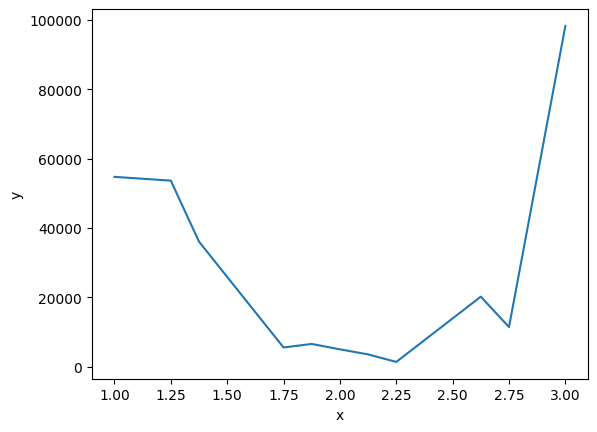

In [29]:
import seaborn as sns

filename = "dataverse_files/Maine_11082022_CongressionalDistrict2.csv"
ballots, candidates = parser.parser(filename)

perms = list(itertools.permutations(candidates))
#most consistant permutation
mcp = None
c_mcp = 0
l = [i for i in range(1, len(candidates) + 1)]
for perm in perms:
    temp = {}
    i = 1
    for candidate in perm:
        temp[candidate] = i
        i += 1
    c = 0
    for b in ballots:
        b_num = []
        for candidate in b:
            b_num.append(temp[candidate])
        if (is_consistant(b_num, l)):
            c += ballots[b]
    if mcp is None or c > c_mcp:
        c_mcp = c
        mcp = perm
    print(perm, " :  ", c/sum(ballots.values()))
print("gamma: ", c_mcp/sum(ballots.values()))
print("mcp: ", mcp)
positions = {}
temp = {}
i = 1
for candidate in mcp:
    temp[candidate] = i
    i += 1
c = 0
ballot_index = {}
index = 1
for b in ballots:
    ballot = []
    for candidate in b:
        ballot.append(temp[candidate])
    if len(ballot) == 0 or is_consistant(ballot, mcp) is False:
        continue

    if b not in ballot_index:
        ballot_index[b] = index 
        index += 1

    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    x += ballot[0]
    if x not in positions:
        positions[x] = 0
    print(b, " : ", x)
    positions[x] += ballots[b]
p_df = pd.DataFrame(columns=["x", "y"])
for p in positions:
    p_df.loc[len(p_df)] = [p, positions[p]]

sns.lineplot(data=p_df, x="x", y="y")
